# Loading Data

In [1]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.3 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=0eec28cd47ea445f3373ab6e9bbec46d9864924dd0502b3bee9b1a83a6f77d9c
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!gdown 19EWhcGURNRhE4hFvMDMJZKB6oc3EA5eY

Downloading...
From: https://drive.google.com/uc?id=19EWhcGURNRhE4hFvMDMJZKB6oc3EA5eY
To: /content/CogNet-v2.0.tsv
100% 382M/382M [00:08<00:00, 45.1MB/s]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

## Cognet Data

In [5]:
df = pd.read_csv('./CogNet-v2.0.tsv', sep='\t', error_bad_lines=False)

<ipython-input-5-cfe69dd3de9e>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('./CogNet-v2.0.tsv', sep='\t', error_bad_lines=False)
Skipping line 299077: expected 7 fields, saw 9
Skipping line 299120: expected 7 fields, saw 9
Skipping line 299129: expected 7 fields, saw 9

Skipping line 506809: expected 7 fields, saw 9

Skipping line 831507: expected 7 fields, saw 9

Skipping line 1239093: expected 7 fields, saw 9

Skipping line 2360370: expected 7 fields, saw 9
Skipping line 2360383: expected 7 fields, saw 9

Skipping line 2686003: expected 7 fields, saw 9

Skipping line 2763282: expected 7 fields, saw 9

Skipping line 5254685: expected 7 fields, saw 9
Skipping line 5289724: expected 7 fields, saw 9

Skipping line 5390339: expected 7 fields, saw 52



In [6]:
english_french = df[((df['lang 1'] == 'eng') & (df['lang 2'] == 'fra')) | ((df['lang 1'] == 'fra') & (df['lang 2'] == 'eng'))]
english_french

,concept id,lang 1,word 1,lang 2,word 2,translit 1,translit 2
83,n00001740,eng,entity,fra,entité,NaN,NaN
3055,n06333653,eng,name,fra,nom,NaN,NaN
5498,n06724763,eng,description,fra,description,NaN,NaN
5604,n06292973,eng,hyponym,fra,hyponyme,NaN,NaN
5605,n06292973,eng,hyponym,fra,hyponymie,NaN,NaN
...,...,...,...,...,...,...,...
5738056,r00506577,eng,fatally,fra,mortellement,NaN,NaN
5738257,r00507716,eng,yesterday,fra,hier,NaN,NaN
5738591,r00512790,eng,affirmatively,fra,affirmativement,NaN,NaN
5738699,r00514781,eng,radioactively,fra,radioactivement,NaN,NaN


In [7]:
english_german = df[((df['lang 1'] == 'eng') & (df['lang 2'] == 'deu')) | ((df['lang 2'] == 'eng') & (df['lang 1'] == 'deu'))]
english_german

,concept id,lang 1,word 1,lang 2,word 2,translit 1,translit 2
399,n00001740,eng,entity,deu,entität,NaN,NaN
403,n00001740,eng,entity,deu,entity,NaN,NaN
692,n06333653,eng,name,deu,name,NaN,NaN
5536,n06292973,eng,hyponym,deu,hyponym,NaN,NaN
5944,n05820620,eng,illustration,deu,illustration,NaN,NaN
...,...,...,...,...,...,...,...
5738633,r00513751,eng,hypnotically,deu,hypnotische,NaN,NaN
5738638,r00513675,eng,erotically,deu,erotisch,NaN,NaN
5738680,r00514618,eng,prepositionally,deu,präpositionale,NaN,NaN
5738694,r00514781,eng,radioactively,deu,radioaktiv,NaN,NaN


In [8]:
french_german = df[((df['lang 1'] == 'fra') & (df['lang 2'] == 'deu')) | ((df['lang 2'] == 'fra') & (df['lang 1'] == 'deu'))]
french_german

,concept id,lang 1,word 1,lang 2,word 2,translit 1,translit 2
173,n00001740,fra,entité,deu,entity,NaN,NaN
180,n00001740,fra,entité,deu,entität,NaN,NaN
3162,n06333653,fra,nom,deu,name,NaN,NaN
5591,n06292973,fra,hyponymie,deu,hyponym,NaN,NaN
5684,n06292973,fra,hyponyme,deu,hyponym,NaN,NaN
...,...,...,...,...,...,...,...
5736709,r00492414,fra,véhémentement,deu,vehement,NaN,NaN
5737479,r00498068,fra,zigzag,deu,zickzack,NaN,NaN
5738276,r00507716,fra,hier,deu,gestern,NaN,NaN
5738501,r00510629,fra,simultanément,deu,simultan,NaN,NaN


## HistData

In [9]:
def load_vocabulary(directory):
  all ={}

  for file in os.listdir(directory):
    if file.endswith('.pkl'):
        file_name = os.path.join(directory, file)
        with open(file_name, 'rb') as f:
            all[file.split('.')[0]] = pickle.load(f)

  return all

def filtered_data(df,lang1_dict,lang2_dict,years):
  filtered_df = df[df['word 1'].isin(lang1_dict[str(years[0])+'-vocab']) & df['word 2'].isin(lang2_dict[str(years[0])+'-vocab'])]
  for y in years[1:]:
    filtered_df = filtered_df[filtered_df['word 1'].isin(lang1_dict[str(y)+'-vocab']) & filtered_df['word 2'].isin(lang2_dict[str(y)+'-vocab'])]
  filtered_df = filtered_df.drop('translit 1', axis=1)
  filtered_df = filtered_df.drop('translit 2', axis=1)
  filtered_df = filtered_df[filtered_df['concept id'].notna()]
  return filtered_df

def load_embeddings(directory,y):
  with open(directory+'/'+str(y)+'-vocab.pkl','rb') as file:
    vocab = pickle.load(file)

  word_embeddings = np.load(directory+'/'+str(y)+'-w.npy')
  word_dict = {word: word_embeddings[i] for i, word in enumerate(vocab)}

  return word_dict

In [10]:
import pickle
import os

# English data
# Folder containing your files
directory_e = r'/content/drive/MyDrive/CSC2611 Project Files/english'

# Create empty dictionary to save data
english_all = load_vocabulary(directory_e)

# French data
# Folder containing your files
directory_f = r'/content/drive/MyDrive/CSC2611 Project Files/french'

# Create empty dictionary to save data
french_all = load_vocabulary(directory_f)

# German data
# Folder containing your files
directory_g = r'/content/drive/MyDrive/CSC2611 Project Files/german'

# Create empty dictionary to save data
german_all = load_vocabulary(directory_g)

In [11]:
# Filtering data
years= [1800,1850,1900,1920,1940,1990]
english_french_filtered = filtered_data(english_french,english_all,french_all,years)
english_german_filtered = filtered_data(english_german,english_all,german_all,years)
french_german_filtered = filtered_data(french_german,french_all,german_all,years)

In [12]:
english_french_filtered

,concept id,lang 1,word 1,lang 2,word 2
83,n00001740,eng,entity,fra,entité
3055,n06333653,eng,name,fra,nom
5498,n06724763,eng,description,fra,description
5953,n05820620,eng,example,fra,exemple
6004,n05820620,eng,illustration,fra,illustration
...,...,...,...,...,...
5738002,r00505639,eng,causally,fra,causal
5738005,r00505521,eng,caudal,fra,caudal
5738056,r00506577,eng,fatally,fra,mortellement
5738257,r00507716,eng,yesterday,fra,hier


In [13]:
# Load embeddings for each year

english_embeddings={}
french_embeddings={}
german_embeddings={}

for y in years:
  english_embeddings[y] = load_embeddings(directory_e,y)
  french_embeddings[y] = load_embeddings(directory_f,y)
  german_embeddings[y] = load_embeddings(directory_g,y)

lang2embedding_dict = {"english":english_embeddings,"french":french_embeddings, "german": german_embeddings}

In [14]:
m = english_french_filtered.merge(english_german_filtered, how='inner', left_on=['concept id', 'word 1'], right_on=['concept id', 'word 1'])
m

,concept id,lang 1_x,word 1,lang 2_x,word 2_x,lang 1_y,lang 2_y,word 2_y
0,n00001740,eng,entity,fra,entité,eng,deu,entity
1,n06333653,eng,name,fra,nom,eng,deu,name
2,n05820620,eng,illustration,fra,illustration,eng,deu,illustration
3,n00004475,eng,organism,fra,organisme,eng,deu,organismus
4,n00006484,eng,cell,fra,cellule,eng,deu,zelle
...,...,...,...,...,...,...,...,...
3473,r00446735,eng,schematically,fra,schématique,eng,deu,schematische
3474,r00470354,eng,subtly,fra,subtilement,eng,deu,subtil
3475,r00492414,eng,vehemently,fra,véhémentement,eng,deu,vehement
3476,r00498068,eng,zigzag,fra,zigzag,eng,deu,zickzack


# Base Utility Functions

In [15]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_distances
import random

# Provides semantic Density and nearest neighbouring words for a given word
def get_semantic_density(word, embeddings,y,neighbours=3,n=True):
  e = list(embeddings[y].values())
  w = list(embeddings[y].keys())
  model = NearestNeighbors(n_neighbors=neighbours,
                        metric='cosine',
                        algorithm='brute')
  model.fit(e)
  w_i=w.index(word)
  embd = [np.array(e[w_i])]
  distances,indices = model.kneighbors(np.array(embd))
  sem_dist = np.mean(distances)
  if (n==False):
    return sem_dist
  neighbours = {}
  for i in indices[0]:
    neighbours[w[i]] = e[i]
  return neighbours,sem_dist


In [16]:
import umap

#Helps create visualization of historical words in a euclidean space
def visualize_words(embeddings,word,years):
  n_words=[]
  t_words=[]
  t_embeddings=[]
  n_embeddings=[]
  all=[]
  plt.figure()
  for y in years:
    neighbor,sd = get_semantic_density(word,embeddings,y)
    t_words.append(word)
    t_embeddings.append(embeddings[y][word])
    for n in neighbor.keys():
      n_words.append(n)
    for v in neighbor.values():
      n_embeddings.append(v)

  all.extend(t_embeddings)
  all.extend(n_embeddings)
  #tsne = TSNE(n_components=2, perplexity=10)
  #words_twodim = tsne.fit_transform(np.array(all))
  umap_model = umap.UMAP(n_components=2,metric='euclidean',n_neighbors=3)
  words_twodim = umap_model.fit_transform(np.array(all))
  t2_embeddings = words_twodim[:len(t_words)]
  n2_embeddings = words_twodim[len(t_words):]

  for i,word in enumerate(t_words):
    plt.text(t2_embeddings[i,0],
                t2_embeddings[i,1],
                "${0}_{{{1}}}$".format(word, years[i]),
                c='k',
                alpha = 1)
  plt.scatter(t2_embeddings[:,0],
                t2_embeddings[:,1],
                c='k',
                alpha = 1,
              s=0.1)
  for i,word in enumerate(n_words):
    plt.text(n2_embeddings[i,0],
                n2_embeddings[i,1],
                "${0}$".format(word),
                c='gray',
                alpha = 0.5)
  plt.scatter(n2_embeddings[:,0],
                n2_embeddings[:,1],
                c='gray',
                alpha = 0.5,
              s=0.1)

# Provides same information as the above funtion as a dataframe
def get_info_dataframe(e_word,f_word,g_word,years):
  columns = ['language','year','word','neighbours','semantic_density']
  data=[]

  if(e_word!=""):
    for y in years:
      n,sd=get_semantic_density(e_word,english_embeddings,y,5)
      data.append(['english',y,e_word,list(n.keys()),sd])

  if(f_word!=""):
    for y in years:
      n,sd=get_semantic_density(f_word,french_embeddings,y,5)
      data.append(['french',y,f_word,list(n.keys()),sd])

  if(g_word!=""):
    for y in years:
      n,sd=get_semantic_density(g_word,german_embeddings,y,5)
      data.append(['german',y,g_word,list(n.keys()),sd])

  df = pd.DataFrame(data, columns=columns)
  return df


## Analysis by viewing in the euclidean space

In [17]:
change_years=[1800,1850,1900,1990]

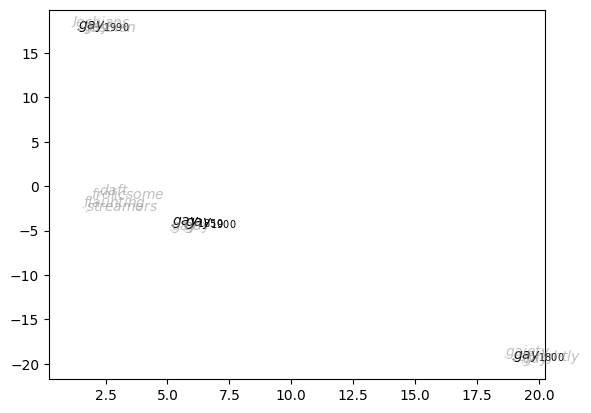

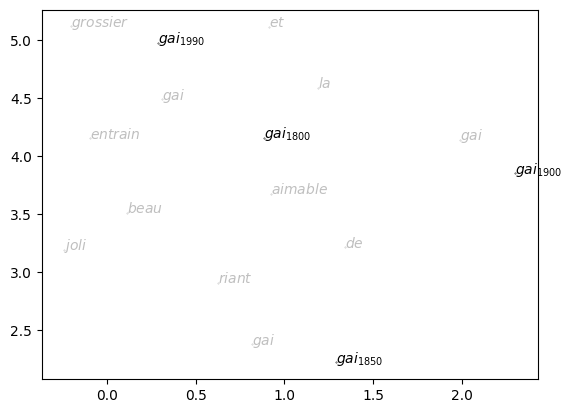

In [18]:
visualize_words(english_embeddings,"gay",change_years)
visualize_words(french_embeddings,"gai",change_years)

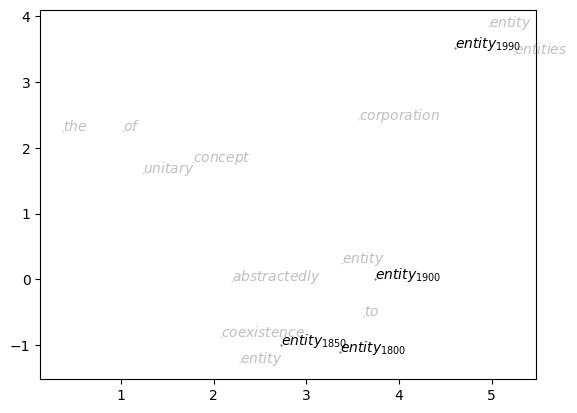

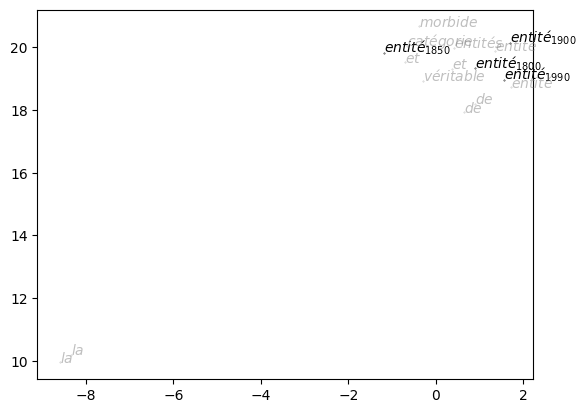

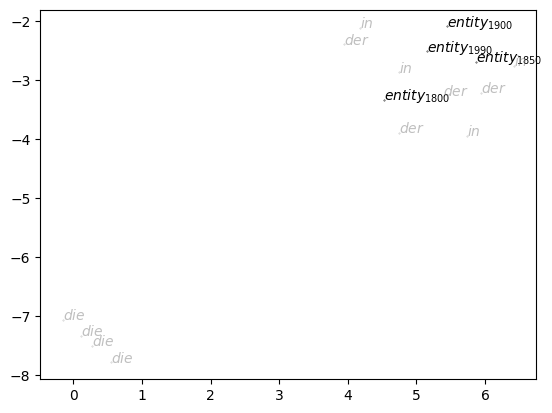

In [19]:
visualize_words(english_embeddings,"entity",change_years)
visualize_words(french_embeddings,"entité",change_years)
visualize_words(german_embeddings,"entity",change_years)

## Analysis of words known to change as dataframes

In [20]:
df=get_info_dataframe("organism","organisme","organismus",change_years)
df

,language,year,word,neighbours,semantic_density
0,english,1800,organism,"[jehudah, nitrification, jenifer, prudes, extr...",1.000000
1,english,1850,organism,"[organism, nutrition, organic, organs, phenome...",0.419821
2,english,1900,organism,"[organism, organisms, unicellular, amoeba, pro...",0.343248
3,english,1990,organism,"[organism, organisms, parasite, bacteria, micr...",0.409153
4,french,1800,organisme,"[kano, sternal, insinua, altercations, mortality]",1.000000
5,french,1850,organisme,"[organisme, nutrition, tissus, parasite, animale]",0.451297
6,french,1900,organisme,"[organisme, humain, tissus, nutrition, digestif]",0.468015
7,french,1990,organisme,"[organisme, organe, nerveux, cellules, plante]",0.480732
8,german,1800,organismus,"[großherzogthümer, räsonnement, plätteisen, ai...",1.000000
9,german,1850,organismus,"[organismus, mechanismus, menschlichen, organi...",0.442591


In [21]:
df=get_info_dataframe("gay","gai","",change_years)
df

,language,year,word,neighbours,semantic_density
0,english,1800,gay,"[gay, sprightly, gaiety, dresses, jollity]",0.396395
1,english,1850,gay,"[gay, flaunting, streamers, gayly, tasteful]",0.445217
2,english,1900,gay,"[gay, frolicsome, daft, joyous, witty]",0.442776
3,english,1990,gay,"[gay, lesbian, lesbians, bisexual, gays]",0.352290
4,french,1800,gai,"[kano, sternal, insinua, altercations, mortality]",1.000000
5,french,1850,gai,"[gai, riant, aimable, gracieux, terne]",0.492698
6,french,1900,gai,"[gai, joli, beau, jolie, élégant]",0.501710
7,french,1990,gai,"[gai, entrain, grossier, brillant, joyeux]",0.537734


## Visualizing trends for semantic density for few words of the corpora

Mean of the words known to change in English:


In [22]:
from sklearn.cluster import KMeans

def plot_trend(trend):

  # Generate some example time series data
  # Replace this with your actual time series data
  num_features = 4
  time_series_data = np.array(trend)

  # Perform K-means clustering
  num_clusters = 3
  kmeans = KMeans(n_clusters=num_clusters, random_state=42)
  clusters = kmeans.fit_predict(time_series_data)

  # Plot the clustered time series data
  cl=['b','r','y']
  plt.figure(figsize=(10, 6))
  for i in range(num_clusters):
      cluster_data = time_series_data[clusters == i].T  # Transpose for plotting
      plt.plot(cluster_data, label=f'Cluster {i + 1}', c=cl[i])

  plt.title('K-means Clustering of Time Series Data')
  plt.xlabel('Time')
  plt.ylabel('Values')
  plt.show()


In [23]:
e_words = ['conjuncture', 'entity', 'organism','motivation','grouping','interaction','interplay','bowling','immigration','manoeuvre']
e_trend=[]
f_words=['entité','illustration', 'organisme','cellule','motivation','interaction','interactions','bowling','immigration','manœuvrer']
f_trend = []
g_words=['theorie', 'sicher','klar','bestehen', 'nation', 'punkt','person','mann', 'volk', 'zwei']
g_trend=[]
years_considered=[1800,1850,1900,1990]

for j,w in enumerate(e_words):
  trend=[]
  for i,y in enumerate(years_considered):
    trend.append(get_semantic_density(w, english_embeddings,y,10,False))
  e_trend.append(np.array(trend))

for w in f_words:
  trend=[]
  for y in years_considered:
    trend.append(get_semantic_density(w, french_embeddings,y,10,False))
  f_trend.append(np.array(trend))

for w in g_words:
  trend=[]
  for y in years_considered:
    trend.append(get_semantic_density(w, german_embeddings,y,10,False))
  g_trend.append(np.array(trend))


In [24]:
# Plotting average trends

avg_e_trend=np.mean(np.array(e_trend),axis=0)
avg_f_trend=np.mean(np.array(f_trend),axis=0)
avg_g_trend=np.mean(np.array(g_trend),axis=0)

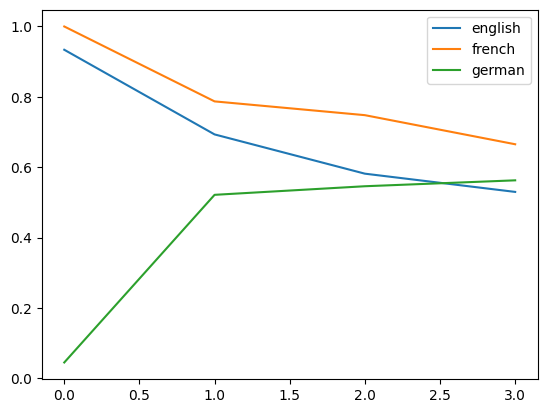

In [25]:
plt.plot(avg_e_trend,label='english')
plt.plot(avg_f_trend,label='french')
plt.plot(avg_g_trend,label='german')
plt.legend()
plt.show()

### Random samples followed by clustering

Clustering is done with n as 3 for expecting decreasing,non-decreasing and increasing categories. This is baseline since we are not aware if any of the words have actually changed.

In [31]:
years_considered=[1800,1850,1900,1990]

e_words=[]
e_trends=[]
f_words=[]
f_trends=[]
g_words=[]
g_trends=[]

for w in random.sample(set(english_all['1800-vocab']),100):
  e_words.append(w)
  trend=[]
  for y in years_considered:
    trend.append(get_semantic_density(w, english_embeddings,y,10,False))
  e_trends.append(np.array(trend))

for w in random.sample(set(french_all['1800-vocab']),100):
  f_words.append(w)
  trend=[]
  for y in years_considered:
    trend.append(get_semantic_density(w, french_embeddings,y,10,False))
  f_trends.append(np.array(trend))

for w in random.sample(set(german_all['1800-vocab']),100):
  g_words.append(w)
  trend=[]
  for y in years_considered:
    trend.append(get_semantic_density(w, german_embeddings,y,10,False))
  g_trends.append(np.array(trend))

<ipython-input-31-f53cf551c02c>:10: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  for w in random.sample(set(english_all['1800-vocab']),100):
<ipython-input-31-f53cf551c02c>:17: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  for w in random.sample(set(french_all['1800-vocab']),100):
<ipython-input-31-f53cf551c02c>:24: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  for w in random.sample(set(german_all['1800-vocab']),100):


In [32]:
# Plotting average trends

avg_e_trends=np.mean(np.array(e_trends),axis=0)
avg_f_trends=np.mean(np.array(f_trends),axis=0)
avg_g_trends=np.mean(np.array(g_trends),axis=0)

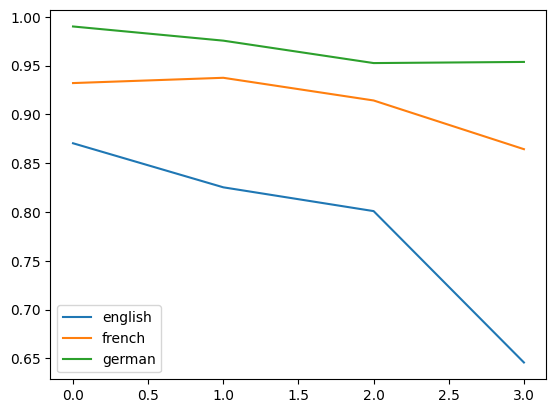

In [33]:
plt.plot(avg_e_trends,label='english')
plt.plot(avg_f_trends,label='french')
plt.plot(avg_g_trends,label='german')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


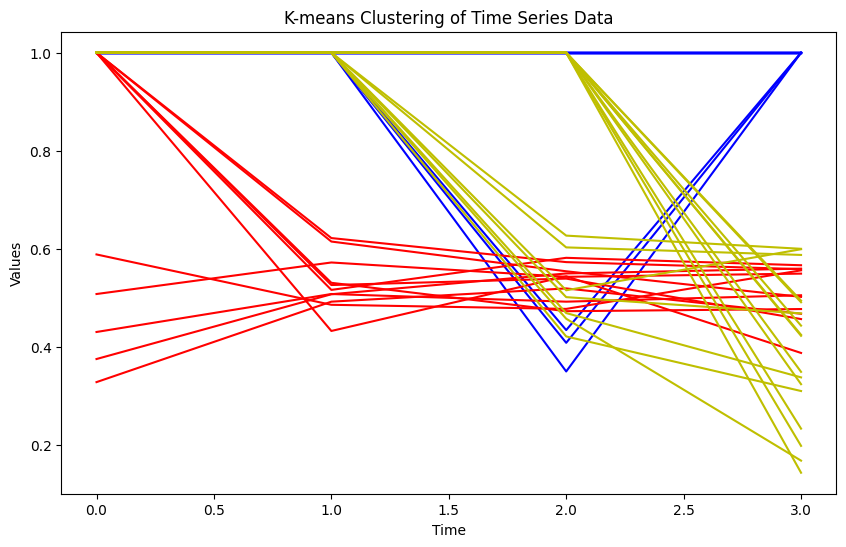

In [28]:
from sklearn.cluster import KMeans

# Generate some example time series data
# Replace this with your actual time series data
num_features = 4
time_series_data = np.array(e_trends)

# Perform K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(time_series_data)

# Plot the clustered time series data
cl=['b','r','y']
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    cluster_data = time_series_data[clusters == i].T  # Transpose for plotting
    plt.plot(cluster_data, label=f'Cluster {i + 1}', c=cl[i])

plt.title('K-means Clustering of Time Series Data')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()


# Auxiliary: Finding words that changed among words found in all languages and all time

In [24]:
# Top 10 Words that changed in english

e_words = list(m.loc[:,"word 1"])
dist =[]
for w in e_words:
  d = cosine_distances([list(english_embeddings[1800][w])],[list(english_embeddings[1990][w])])[0][0]
  dist.append(d)

cd = dict(zip(e_words,dist))
cd_s = sorted(cd.items(), key=lambda x:x[1], reverse=True)

In [25]:
cd_s[:10]

[('conjuncture', 1.029407250916321),
 ('entity', 1.0),
 ('organism', 1.0),
 ('motivation', 1.0),
 ('grouping', 1.0),
 ('interaction', 1.0),
 ('interplay', 1.0),
 ('bowling', 1.0),
 ('immigration', 1.0),
 ('manoeuvre', 1.0)]

In [30]:
# Top 10 Words that changed in french

f_words = list(m.loc[:,"word 2_x"])
dist =[]
for w in f_words:
  d = cosine_distances([list(french_embeddings[1800][w])],[list(french_embeddings[1990][w])])[0][0]
  dist.append(d)

cdf = dict(zip(f_words,dist))
cdf_s = sorted(cdf.items(), key=lambda x:x[1], reverse=True)

In [31]:
cdf_s[:10]

[('entité', 1.0),
 ('illustration', 1.0),
 ('organisme', 1.0),
 ('cellule', 1.0),
 ('motivation', 1.0),
 ('interaction', 1.0),
 ('interactions', 1.0),
 ('bowling', 1.0),
 ('immigration', 1.0),
 ('manœuvrer', 1.0)]

In [33]:
# Top 10 Words that changed in german

g_words = list(m.loc[:,"word 2_y"])
dist =[]
for w in g_words:
  d = cosine_distances([list(german_embeddings[1800][w])],[list(german_embeddings[1990][w])])[0][0]
  dist.append(d)

cdg = dict(zip(g_words,dist))
cdg_s = sorted(cdg.items(), key=lambda x:x[1], reverse=True)

In [34]:
cdg_s[:10]

[('theorie', 1.1222982428606854),
 ('sicher', 1.0977397195758611),
 ('klar', 1.0894074940304561),
 ('bestehen', 1.0699746308696987),
 ('nation', 1.0676142388051657),
 ('punkt', 1.0528848271648183),
 ('person', 1.0405068180445483),
 ('mann', 1.0390555290043644),
 ('volk', 1.0300729576022958),
 ('zwei', 1.0297412761794114)]